In [68]:
import requests
import networkx as nx
import matplotlib.pyplot as plt

Downloading Required Data

In [5]:
file1="https://people.rit.edu/nxmsma/courses/webpage-math789/data/simMat1.csv"
file2="https://people.rit.edu/nxmsma/courses/webpage-math789/data/simlabels.txt"
simMat=requests.get(file1)
with open("./data/simMat.csv", "wb") as f:
    f.write(simMat.content)
simLab=requests.get(file2)
with open("./data/simLable.txt","wb") as text_file:
    text_file.write(simLab.content)


PermissionError: [Errno 13] Permission denied: './data/simMat.csv'

Parsing data

In [63]:
with open('./data/simMat.csv', 'r') as f:
    reader=f.readlines()
    
data=[]
for row in reader:
    row=row[:-1]
    r=row.split(',')
    datum=[float(n) for n in r]
    data.append(datum)

print(data)

with open('./data/simLable.txt', 'r') as f:
    labels=f.readlines()
id=[int(i[0:2].strip())-1 for i in labels]
labels=[l[2:-1] for l in labels]
labelDict={}
for i in range(0, 15):
    labelDict[id[i]]=labels[i]

print(labelDict)

[[100.0, 65.04, 67.59, 65.11, 68.93, 82.45, 69.54, 22.24, 42.36, 42.34, 41.15, 20.09, 39.76, 82.54, 99.26], [65.04, 100.0, 67.06, 75.3, 65.02, 65.08, 64.85, 24.6, 44.99, 44.96, 43.85, 22.22, 42.39, 66.94, 64.79], [67.59, 67.06, 100.0, 68.09, 75.58, 67.05, 67.29, 23.24, 42.76, 42.77, 41.37, 21.05, 40.16, 65.61, 67.3], [65.11, 75.3, 68.09, 100.0, 65.4, 64.84, 64.97, 24.58, 44.5, 44.53, 43.26, 22.26, 42.53, 67.09, 64.84], [68.93, 65.02, 75.58, 65.4, 100.0, 68.22, 68.94, 22.15, 41.91, 41.9, 40.58, 20.0, 38.53, 63.96, 68.96], [82.45, 65.08, 67.05, 64.84, 68.22, 100.0, 69.01, 22.42, 42.68, 42.64, 41.67, 20.25, 40.08, 77.07, 82.14], [69.54, 64.85, 67.29, 64.97, 68.94, 69.01, 100.0, 22.25, 42.29, 42.26, 41.36, 20.09, 38.66, 64.57, 69.23], [22.24, 24.6, 23.24, 24.58, 22.15, 22.42, 22.25, 100.0, 40.77, 40.87, 42.36, 59.15, 44.38, 25.59, 22.08], [42.36, 44.99, 42.76, 44.5, 41.91, 42.68, 42.29, 40.77, 100.0, 93.24, 63.97, 38.5, 56.88, 46.45, 42.13], [42.34, 44.96, 42.77, 44.53, 41.9, 42.64, 42.26,

Adding Edges based on the Similarity Matrix

In [66]:
threshold=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95]
Graphs=[]

for t in threshold:
    G=nx.Graph()
    G.add_nodes_from(range(15))
    for i in range(0, 15):
        for j in range(0, i+1):
            if i==j:
                continue
            if(data[i][j]>=t):
                G.add_edge(i,j)
    Graphs.append(G)


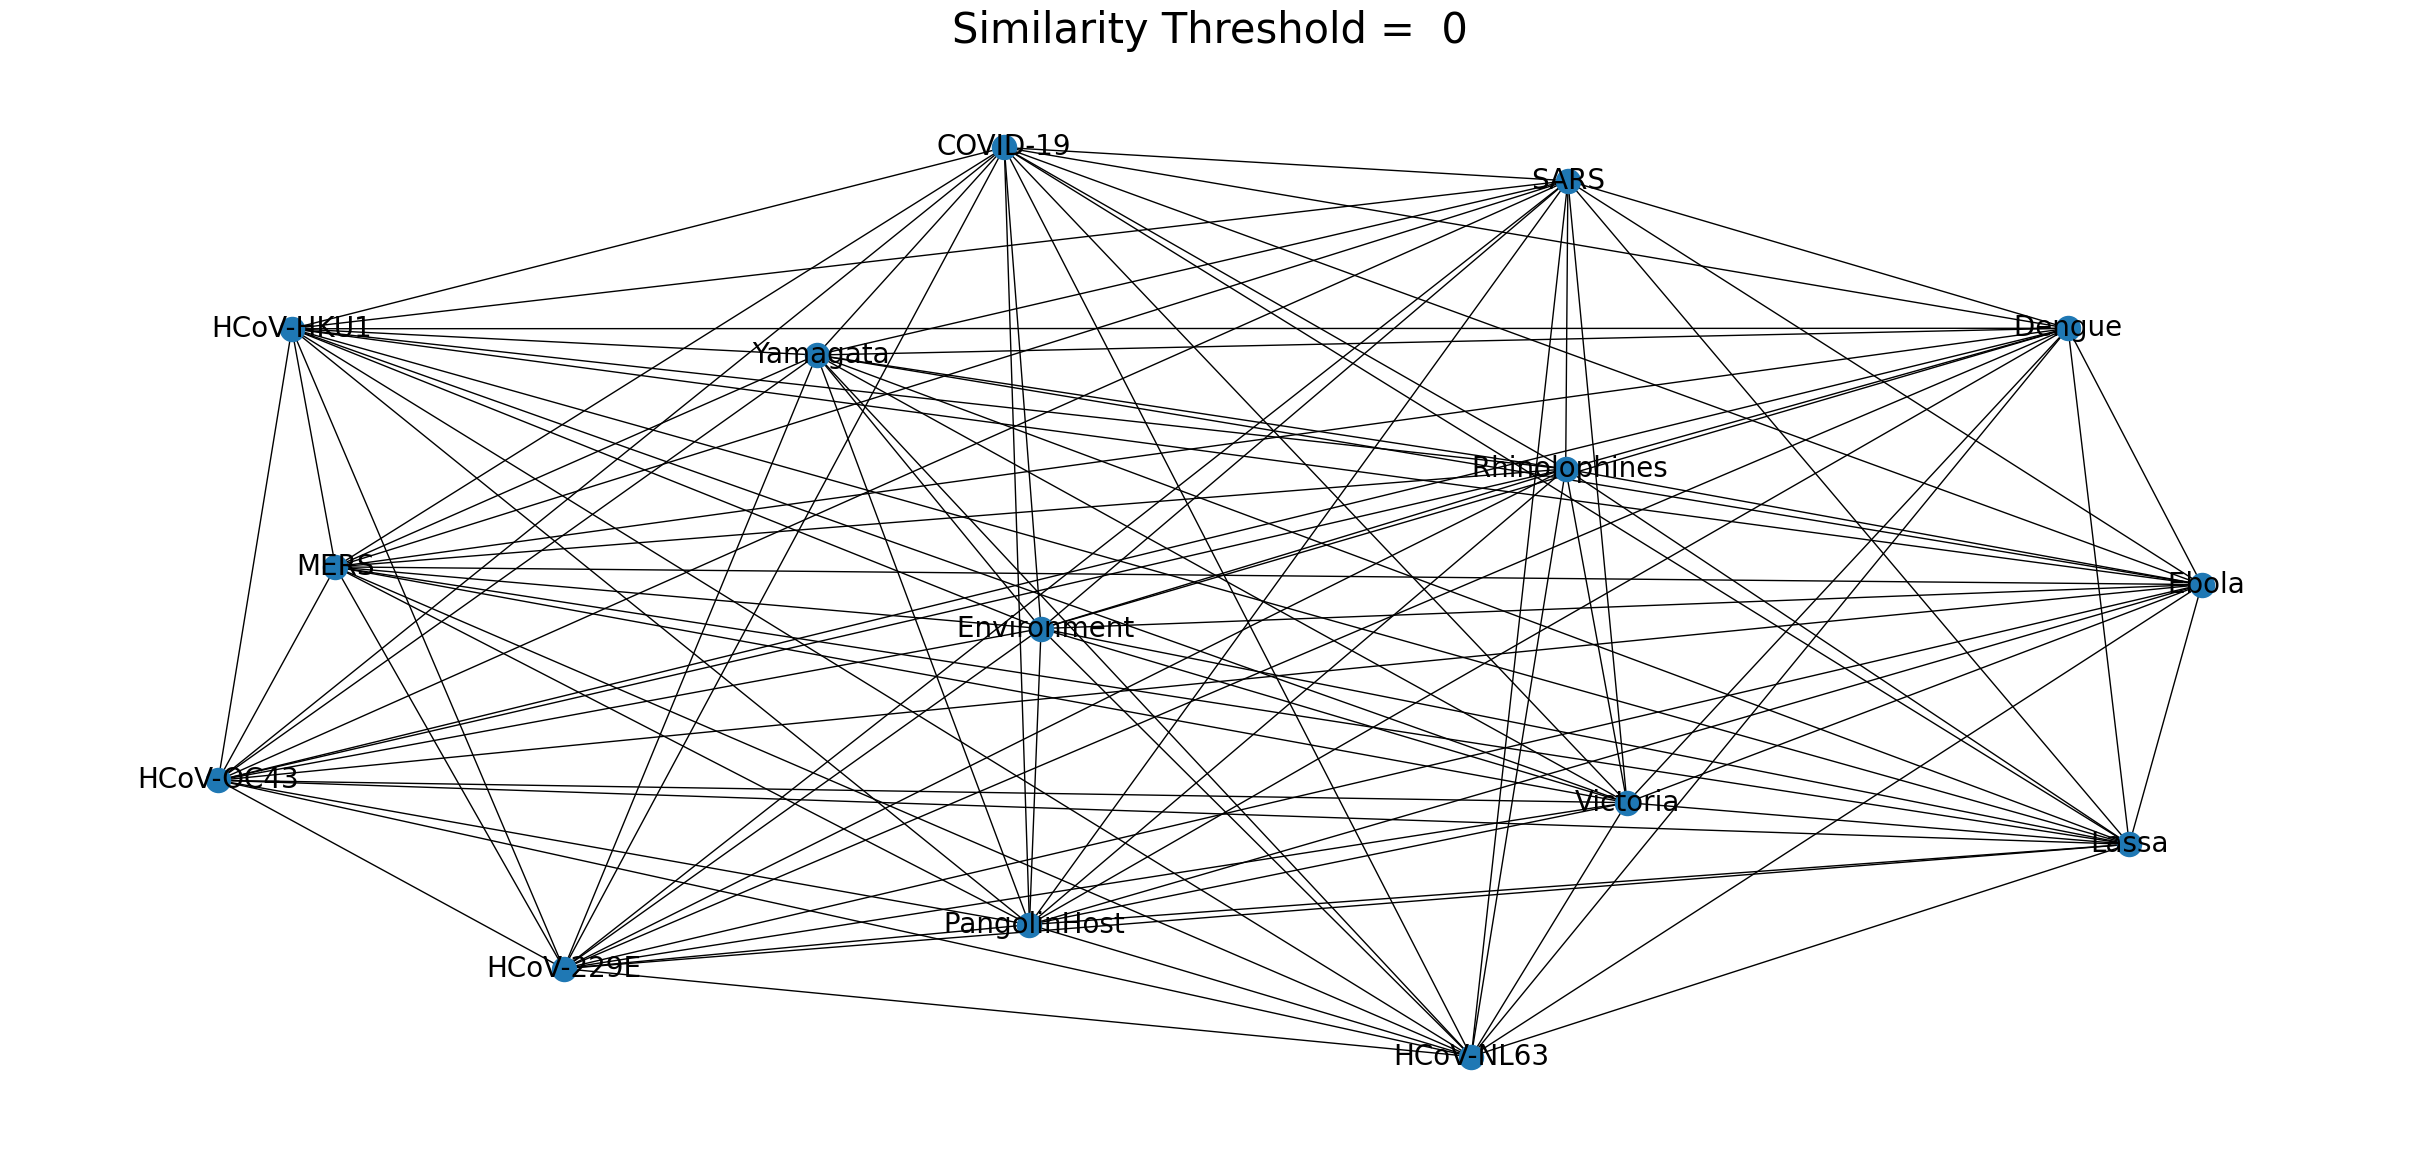

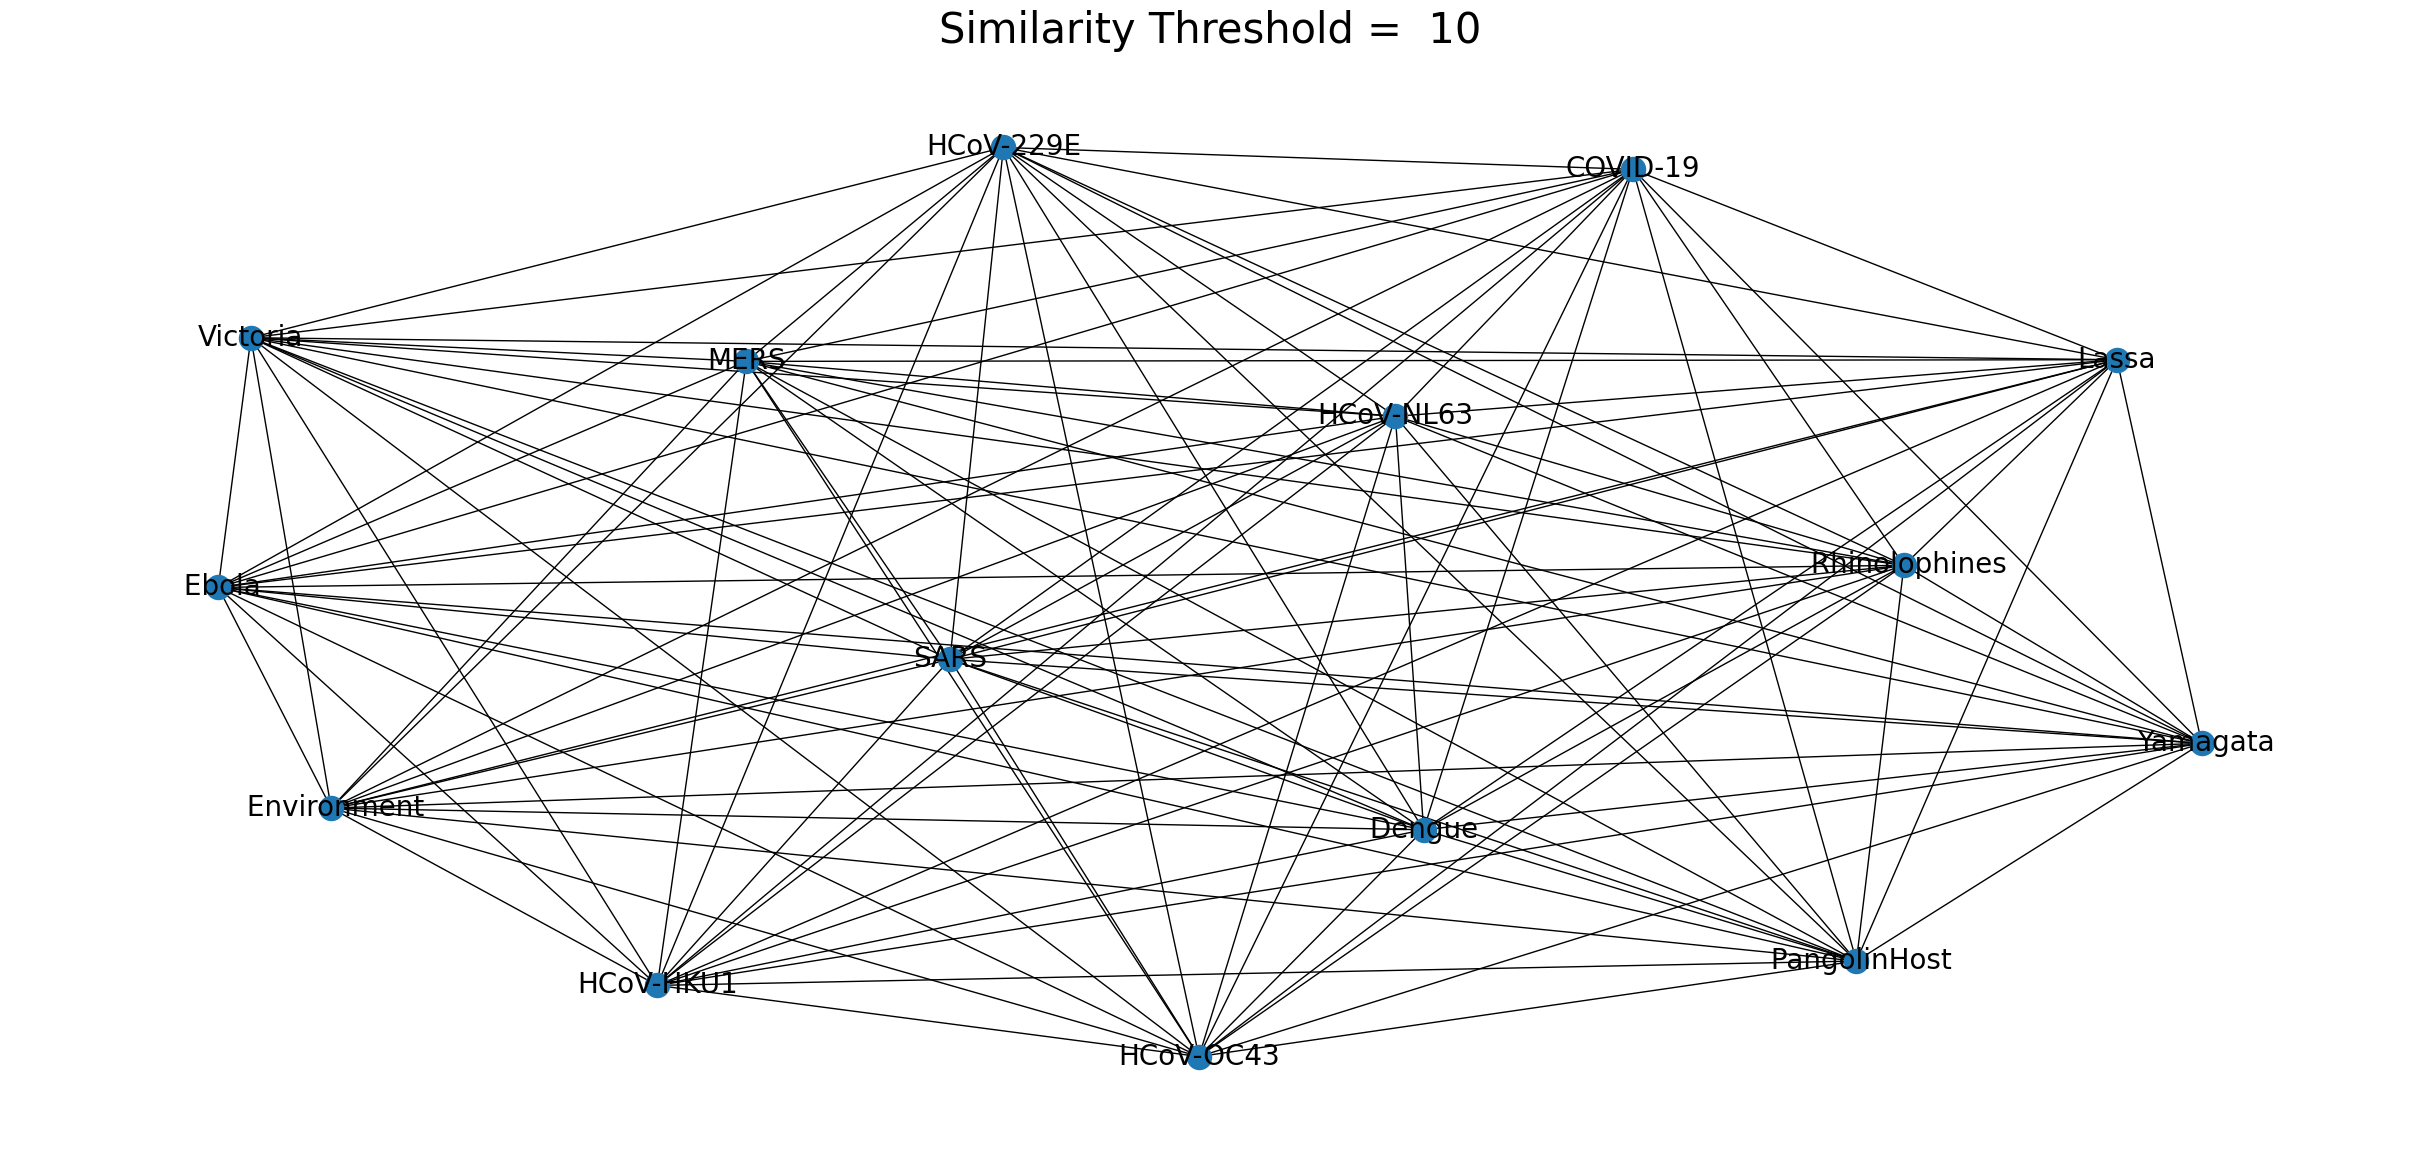

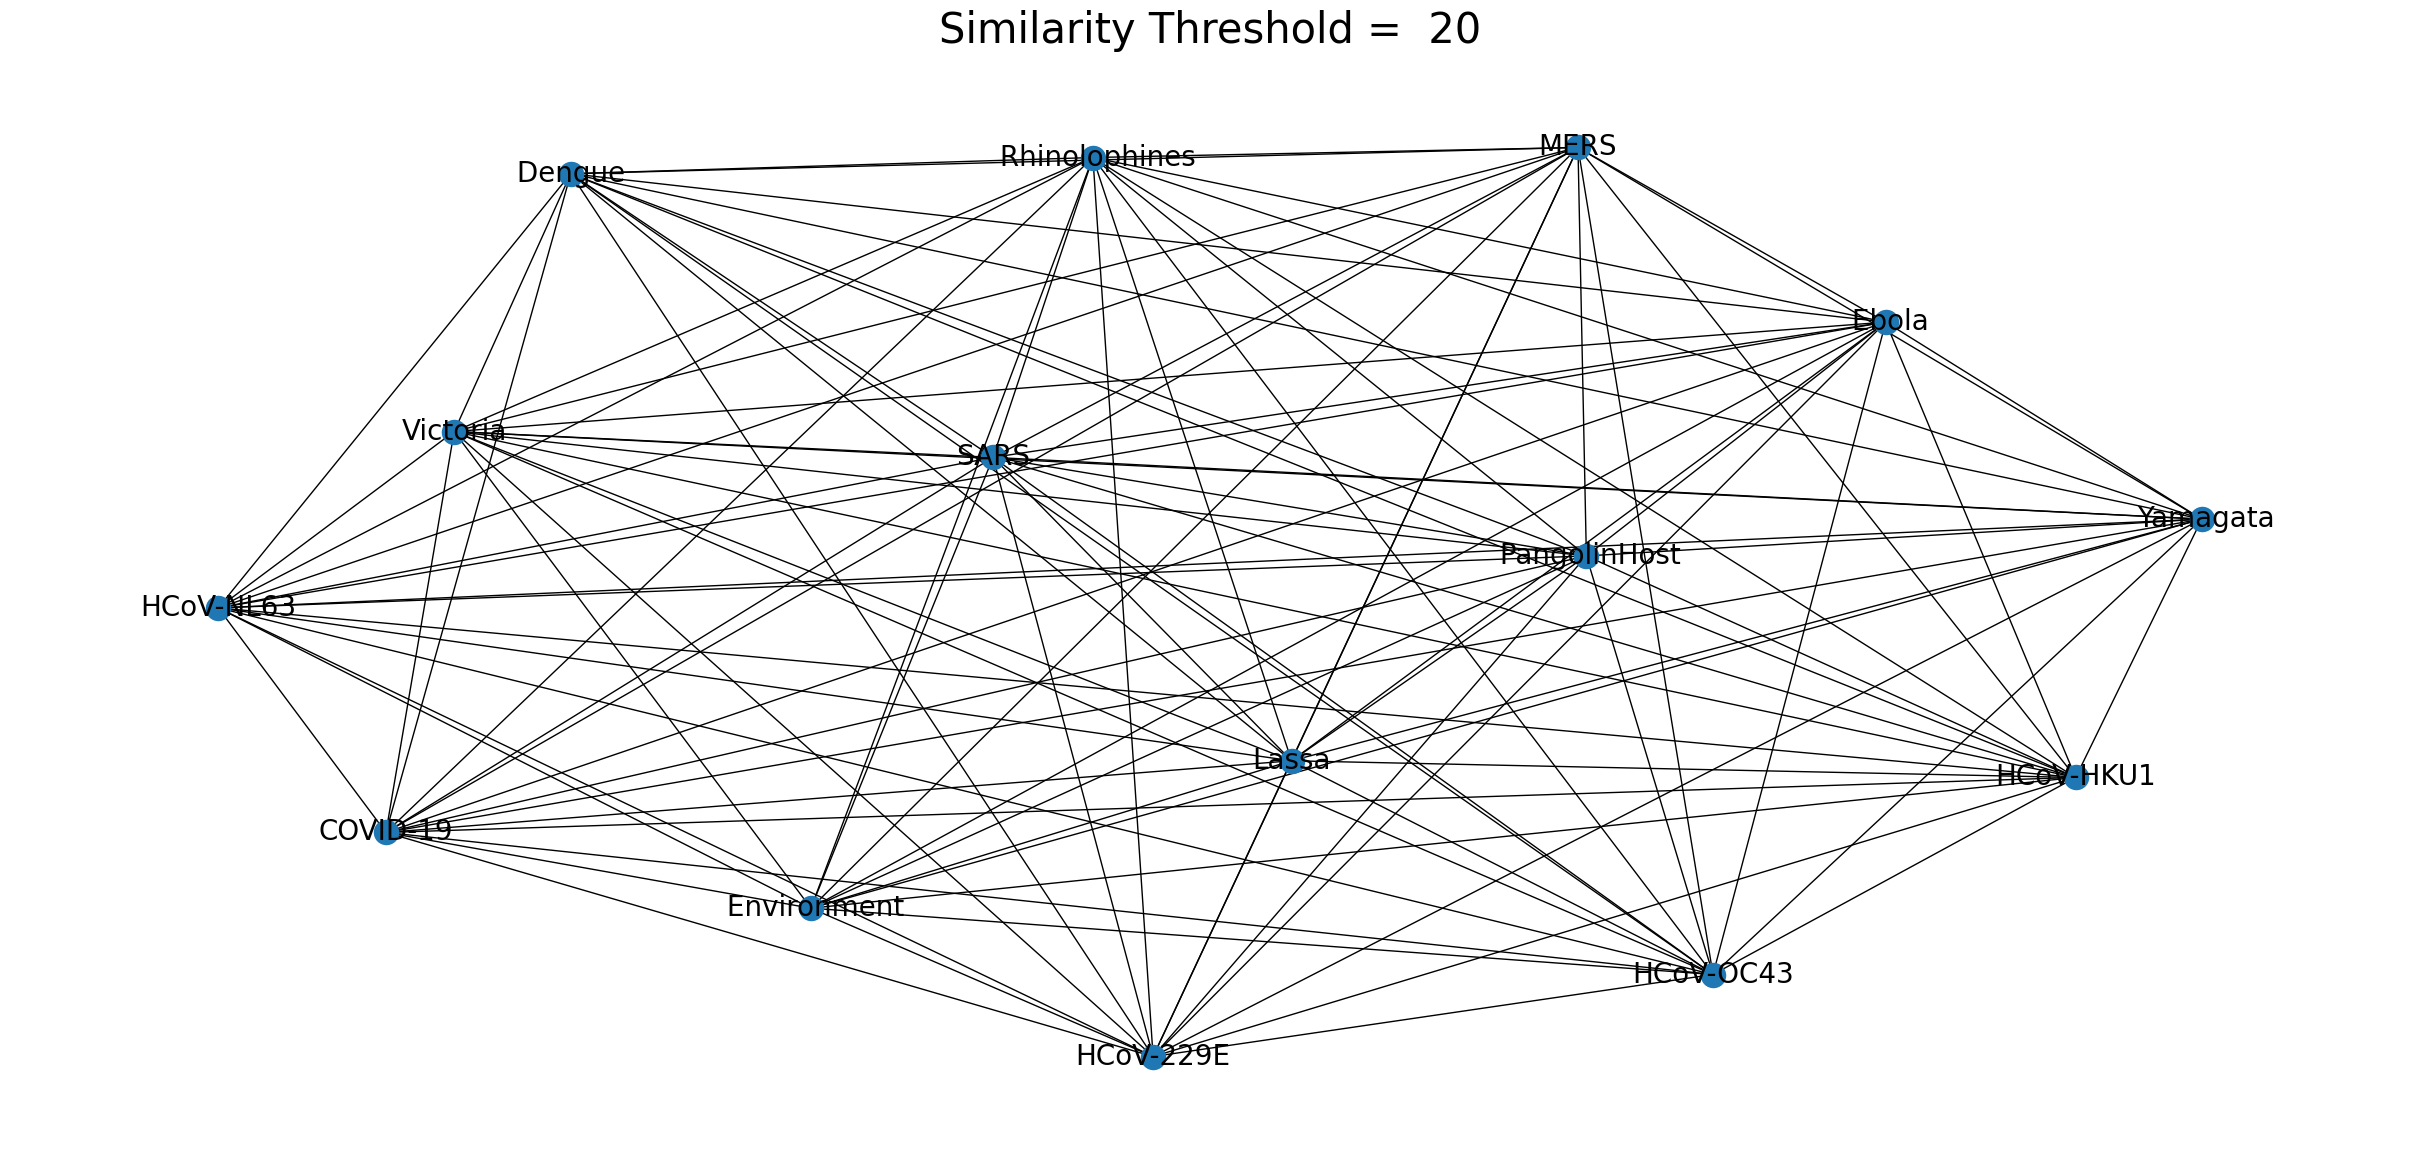

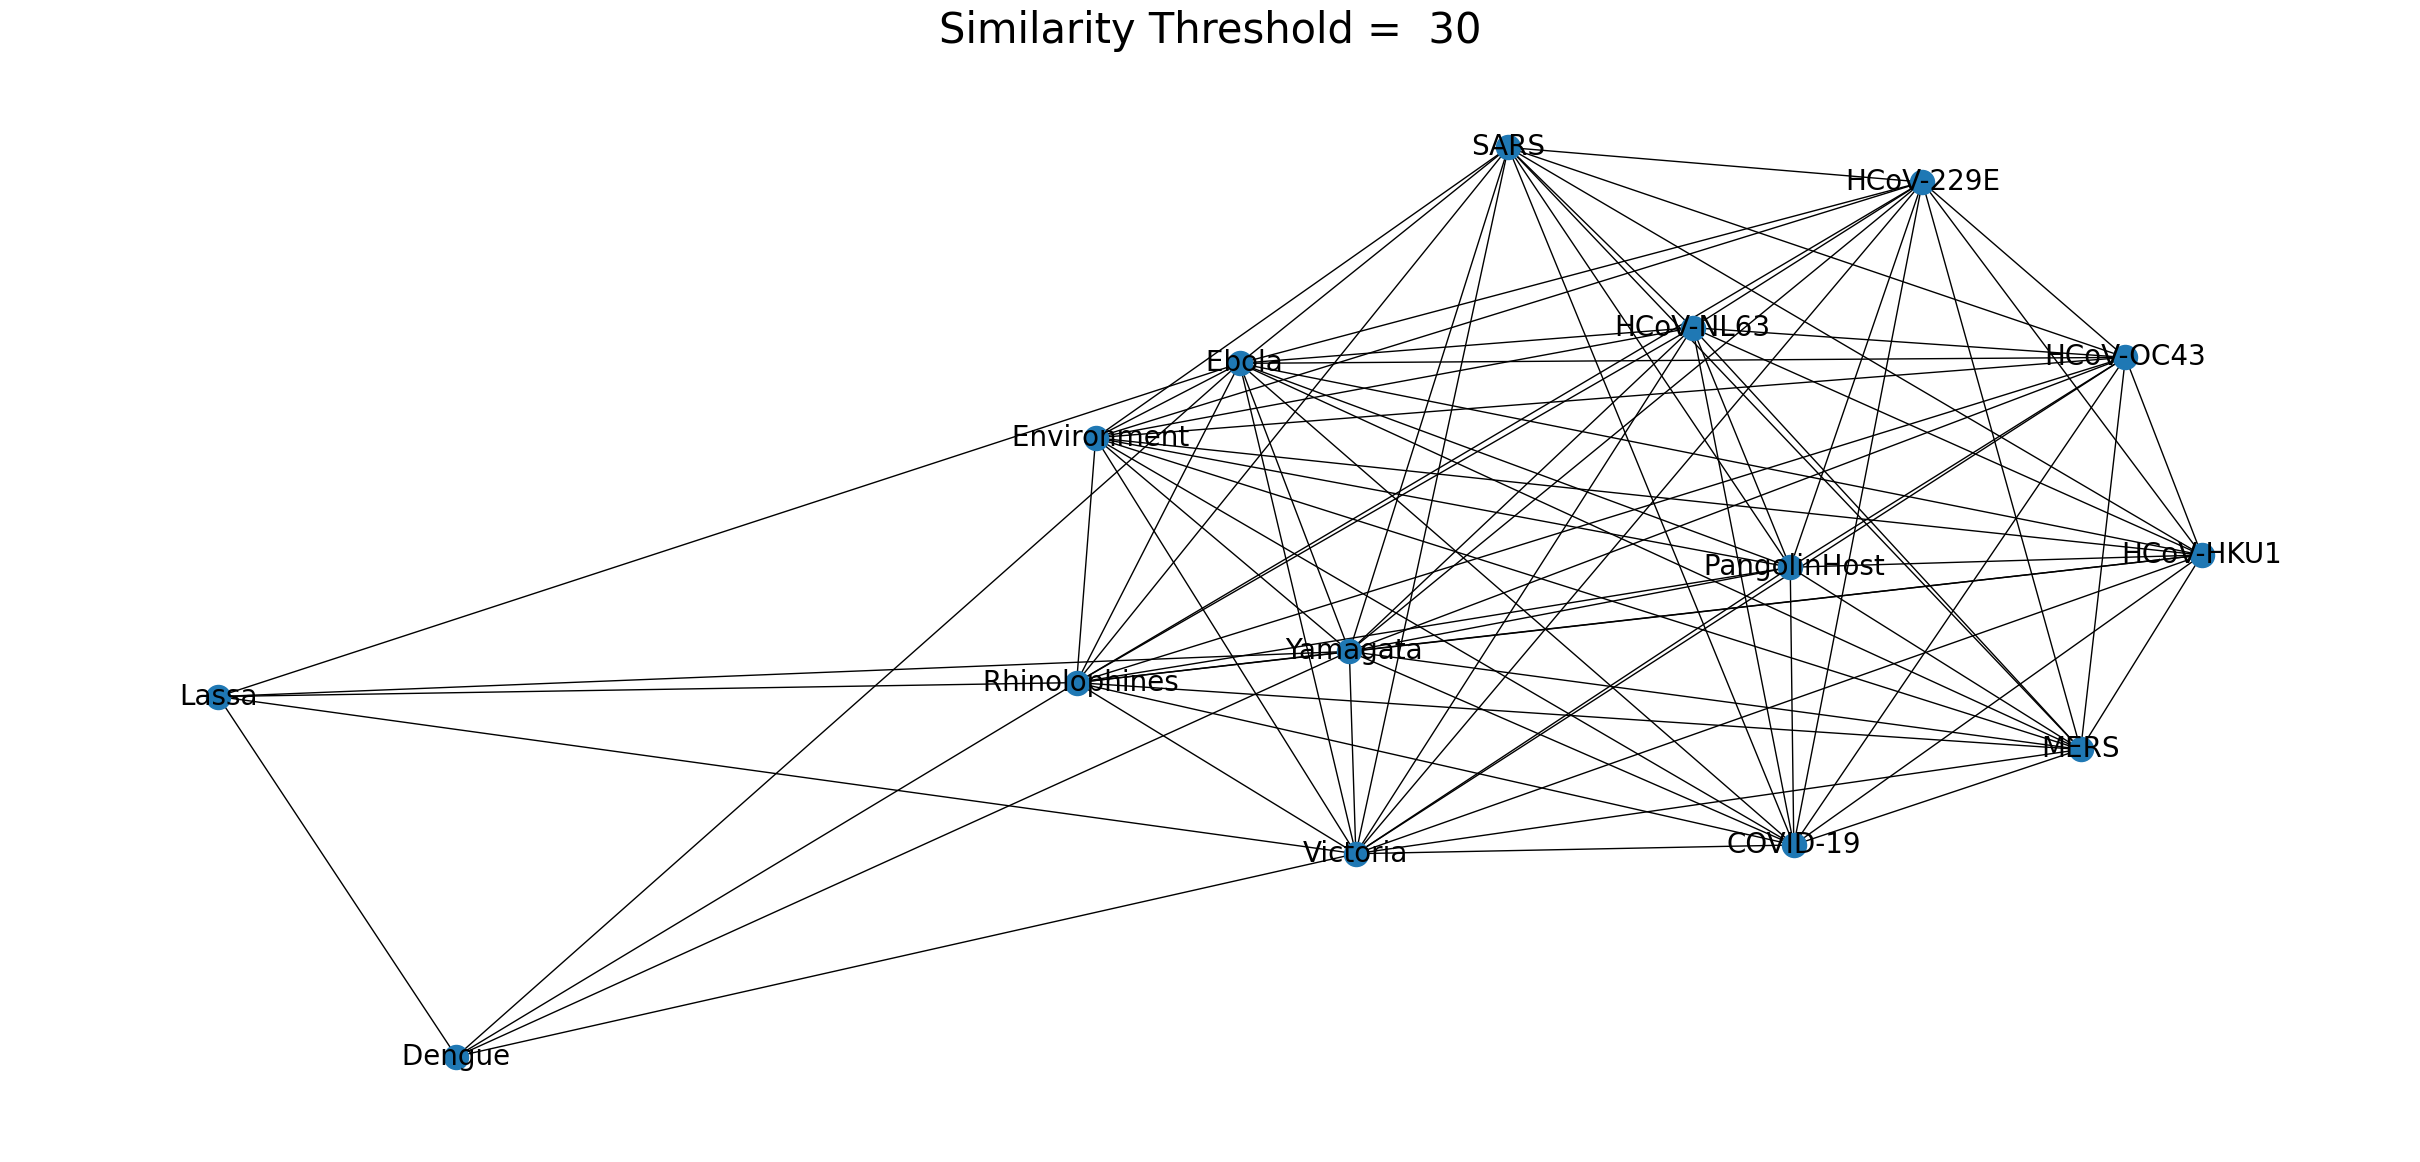

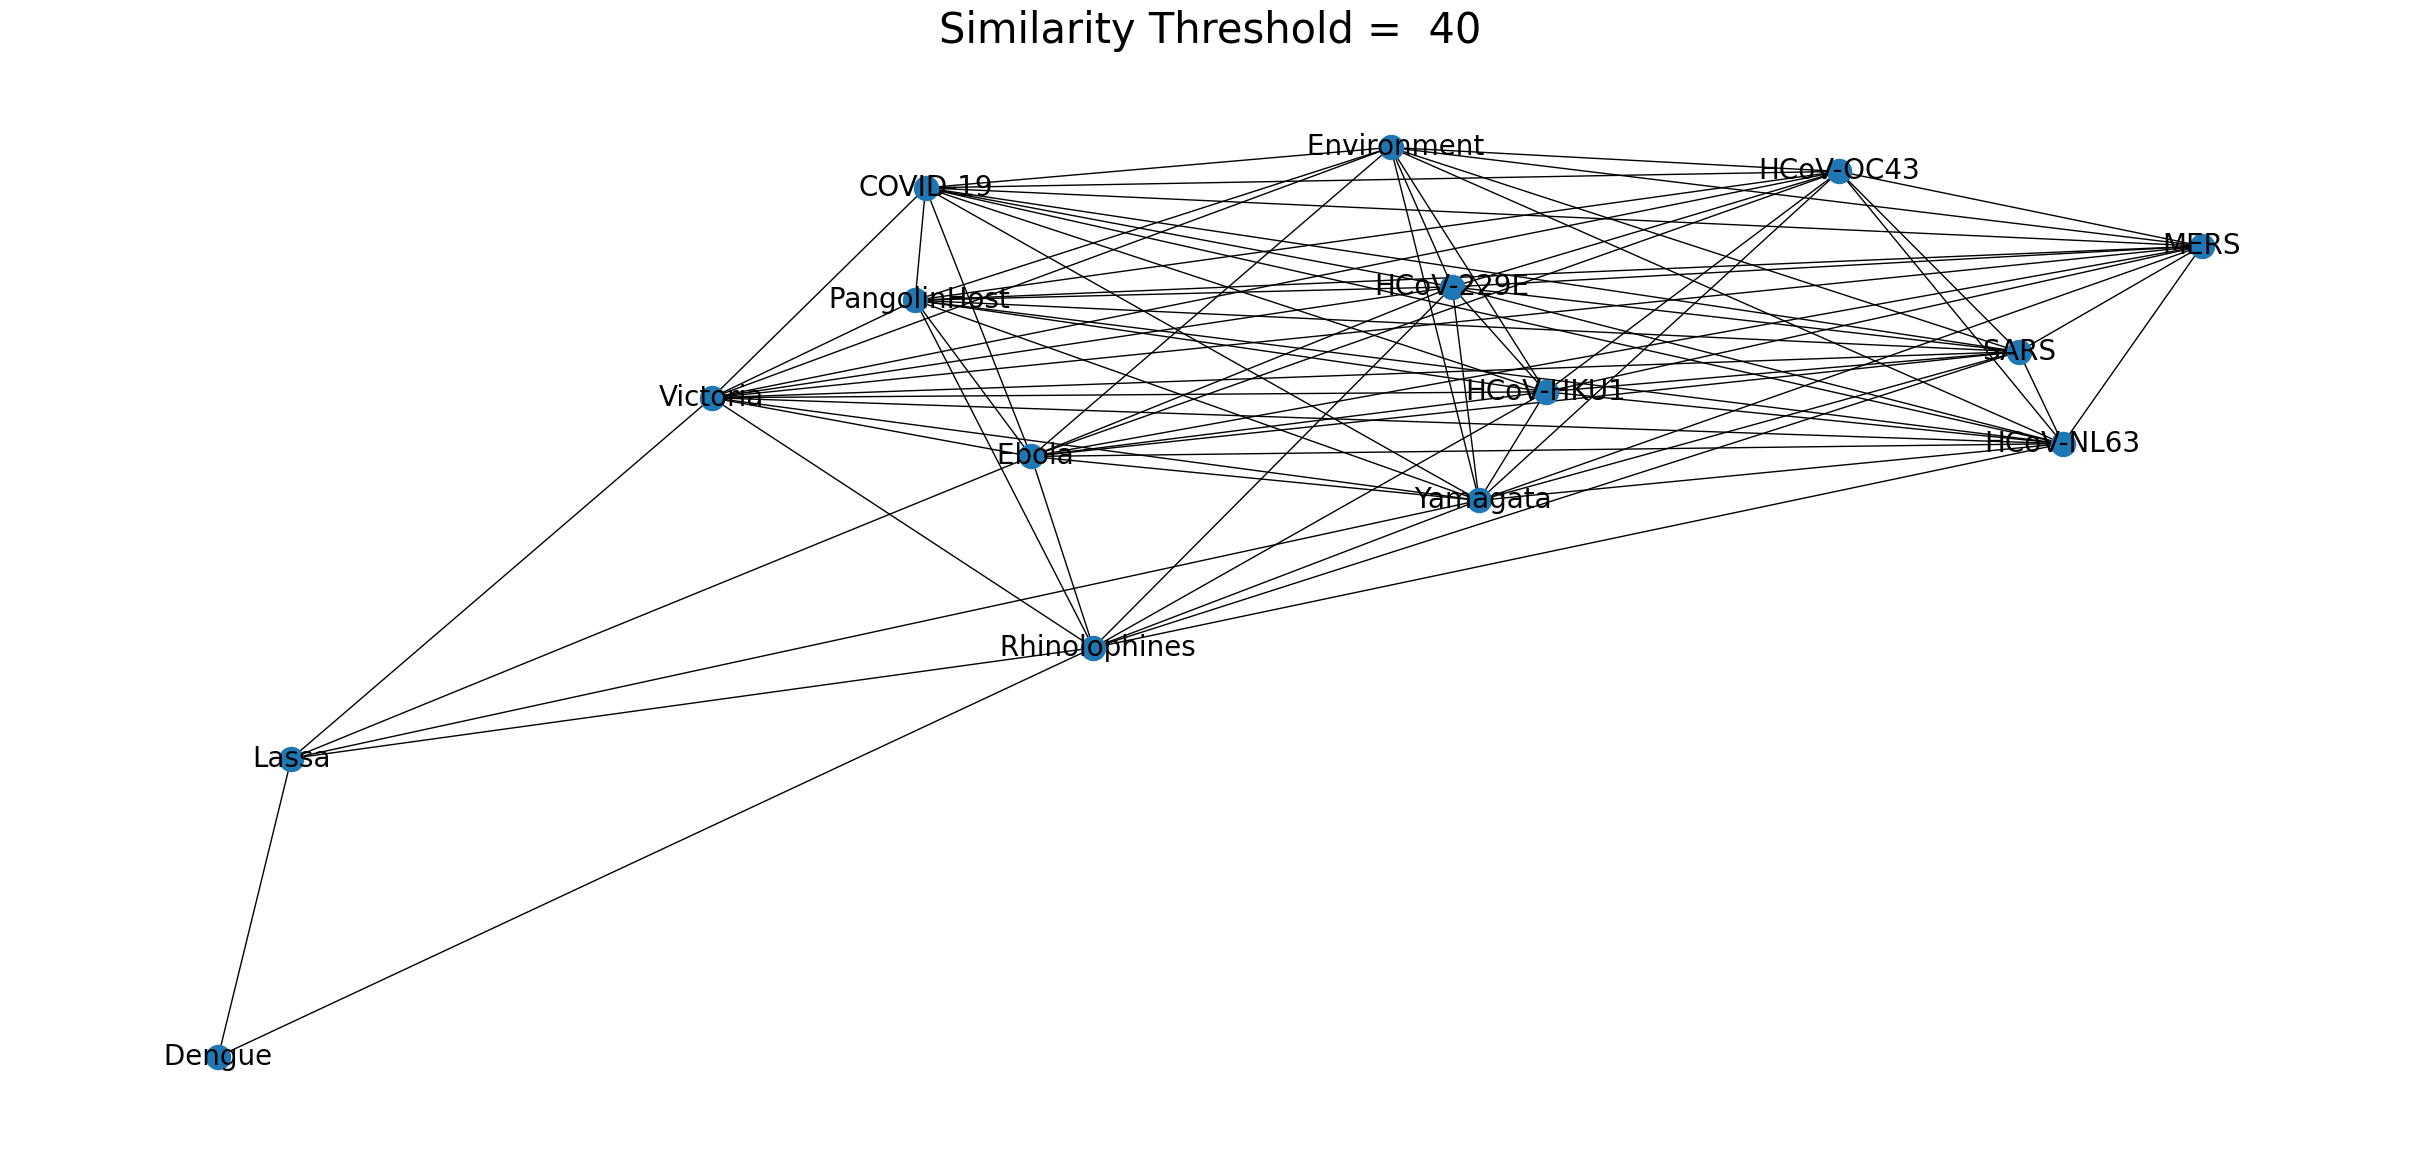

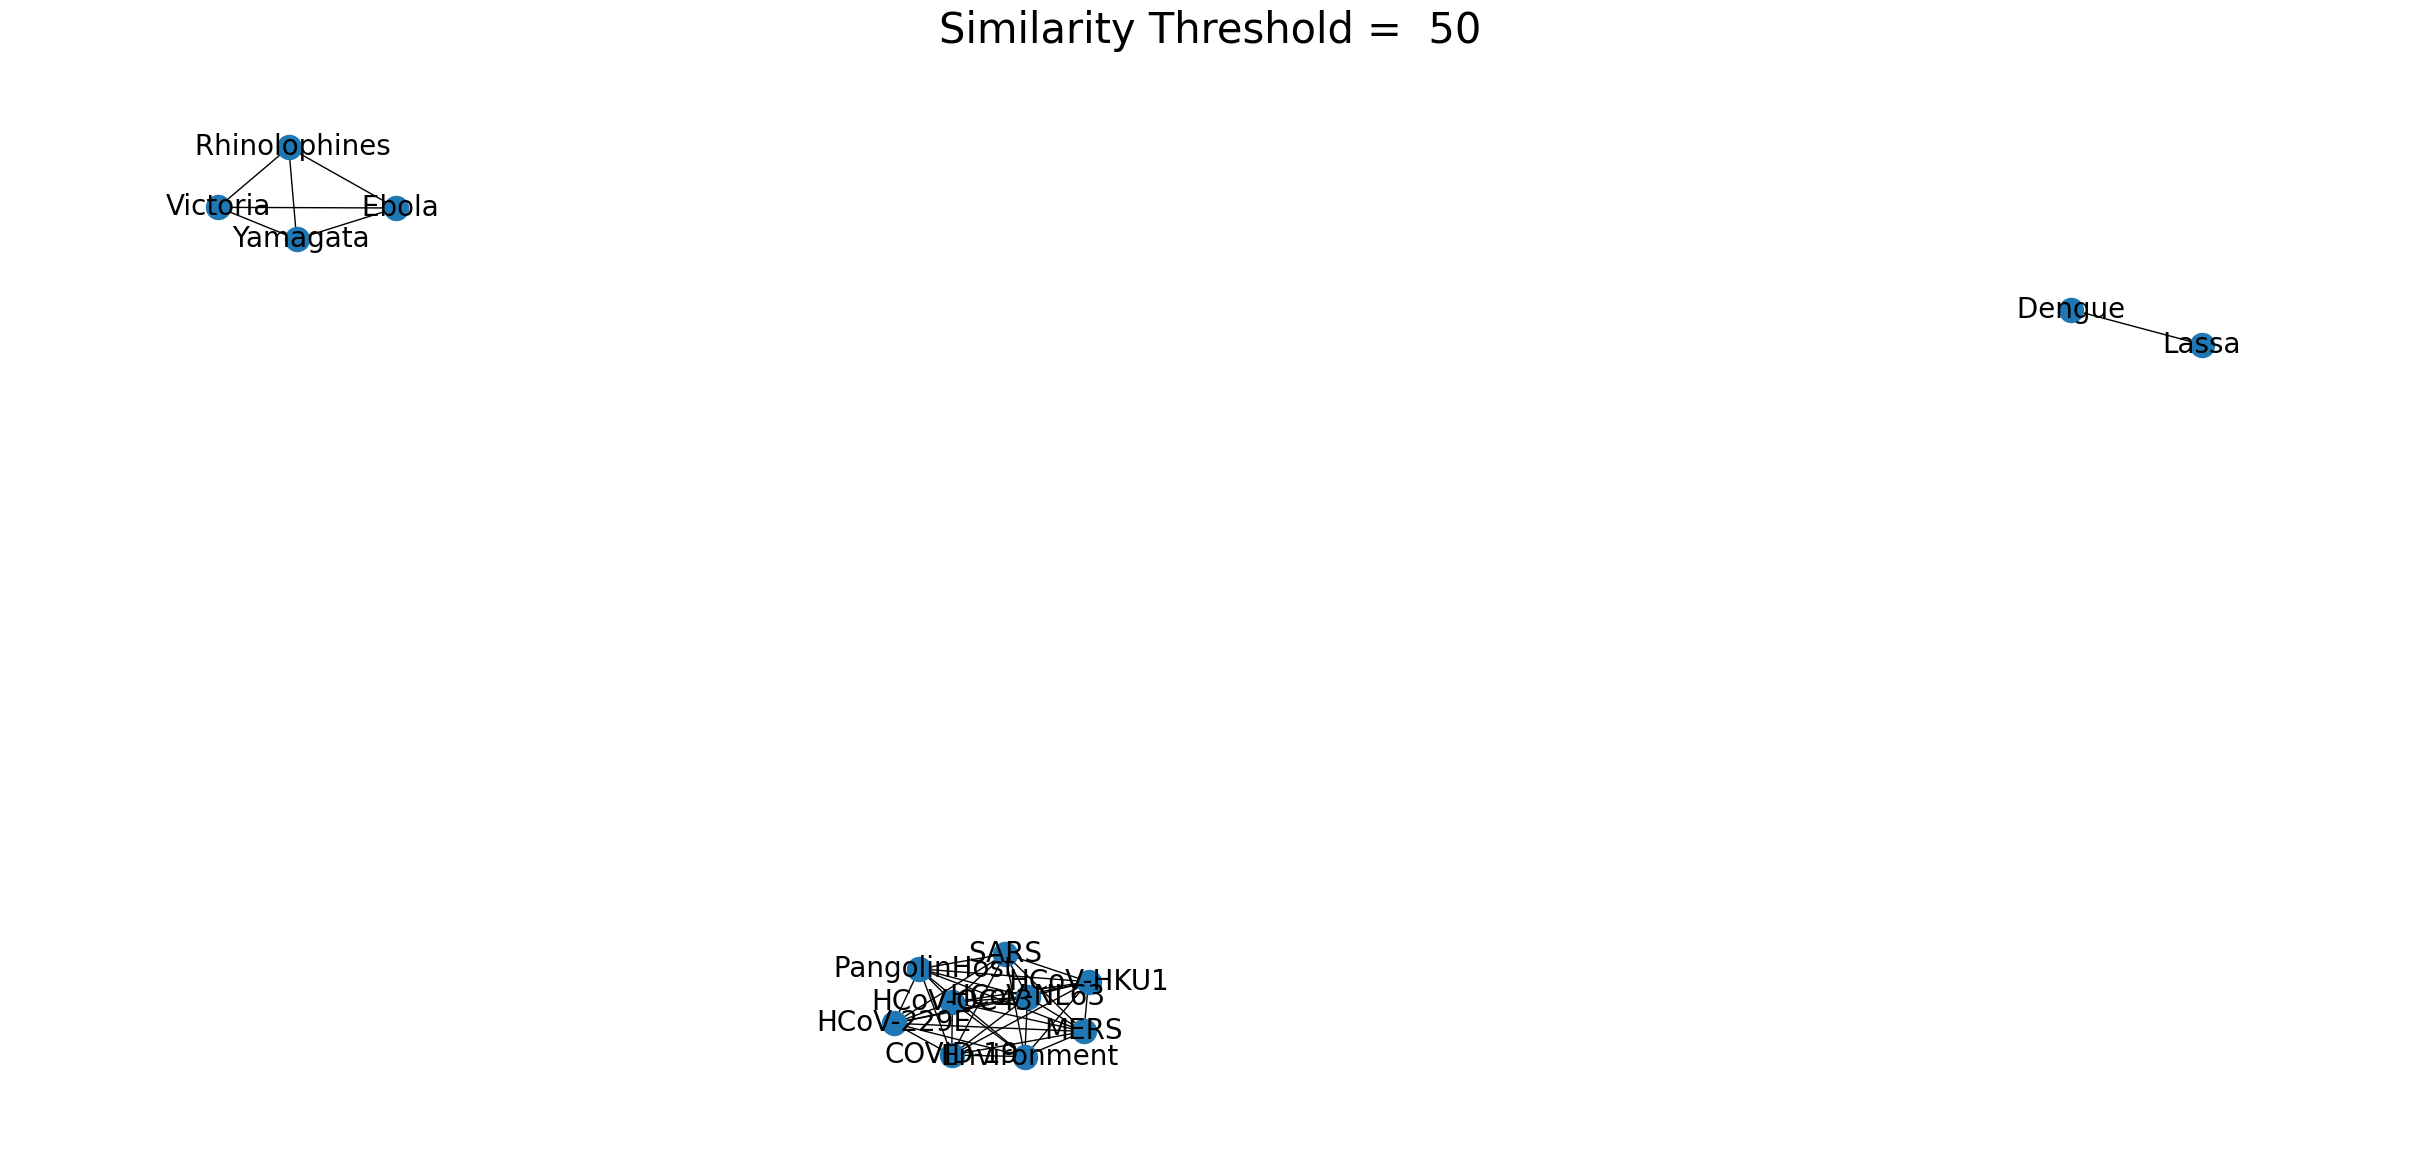

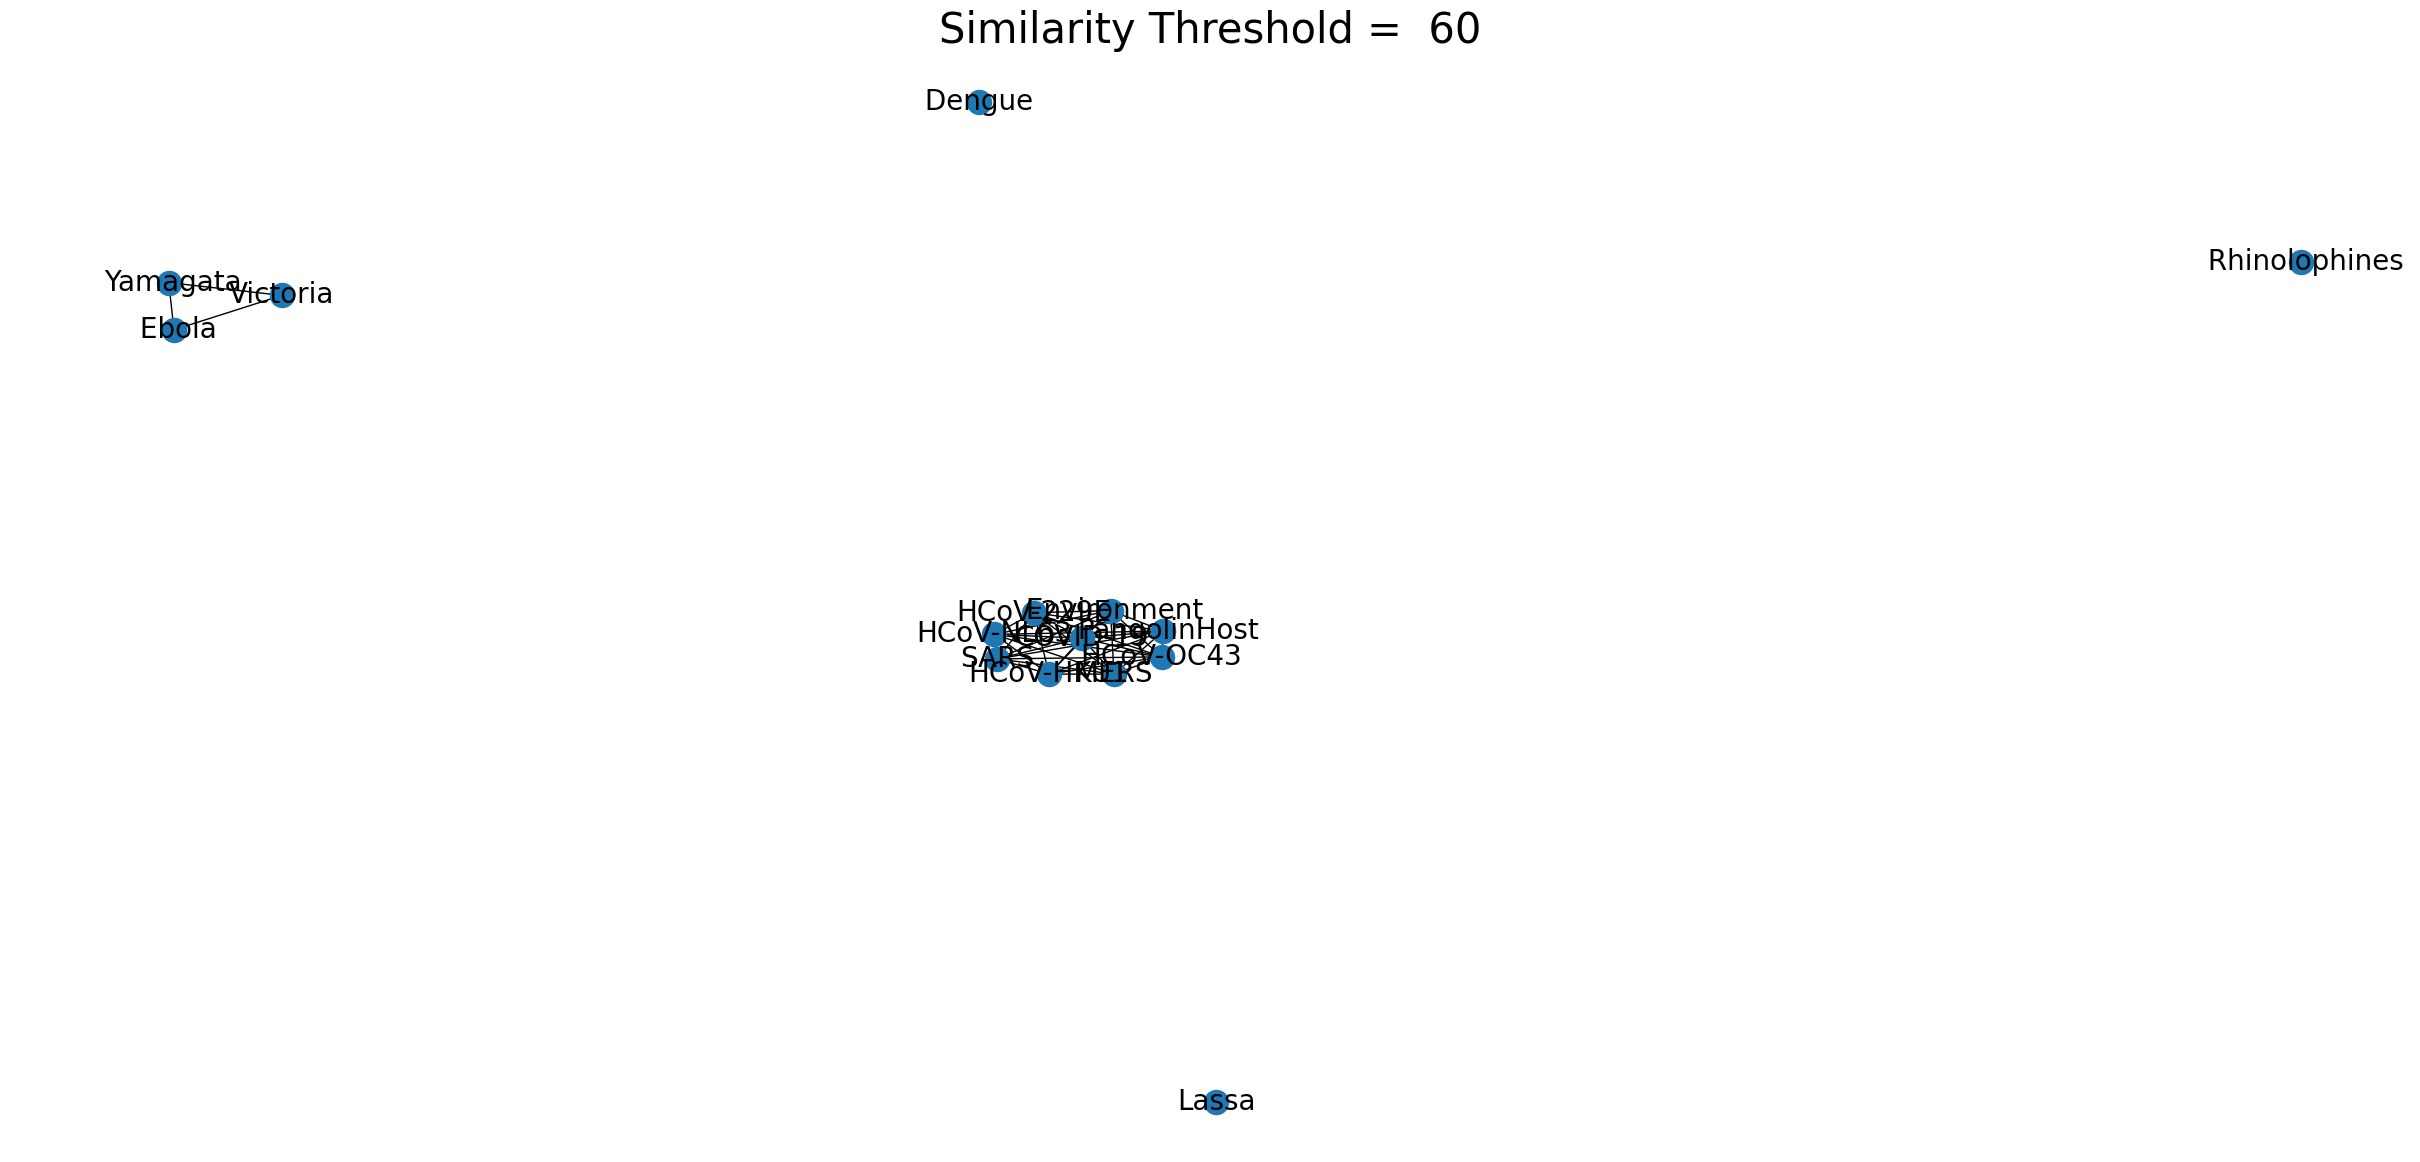

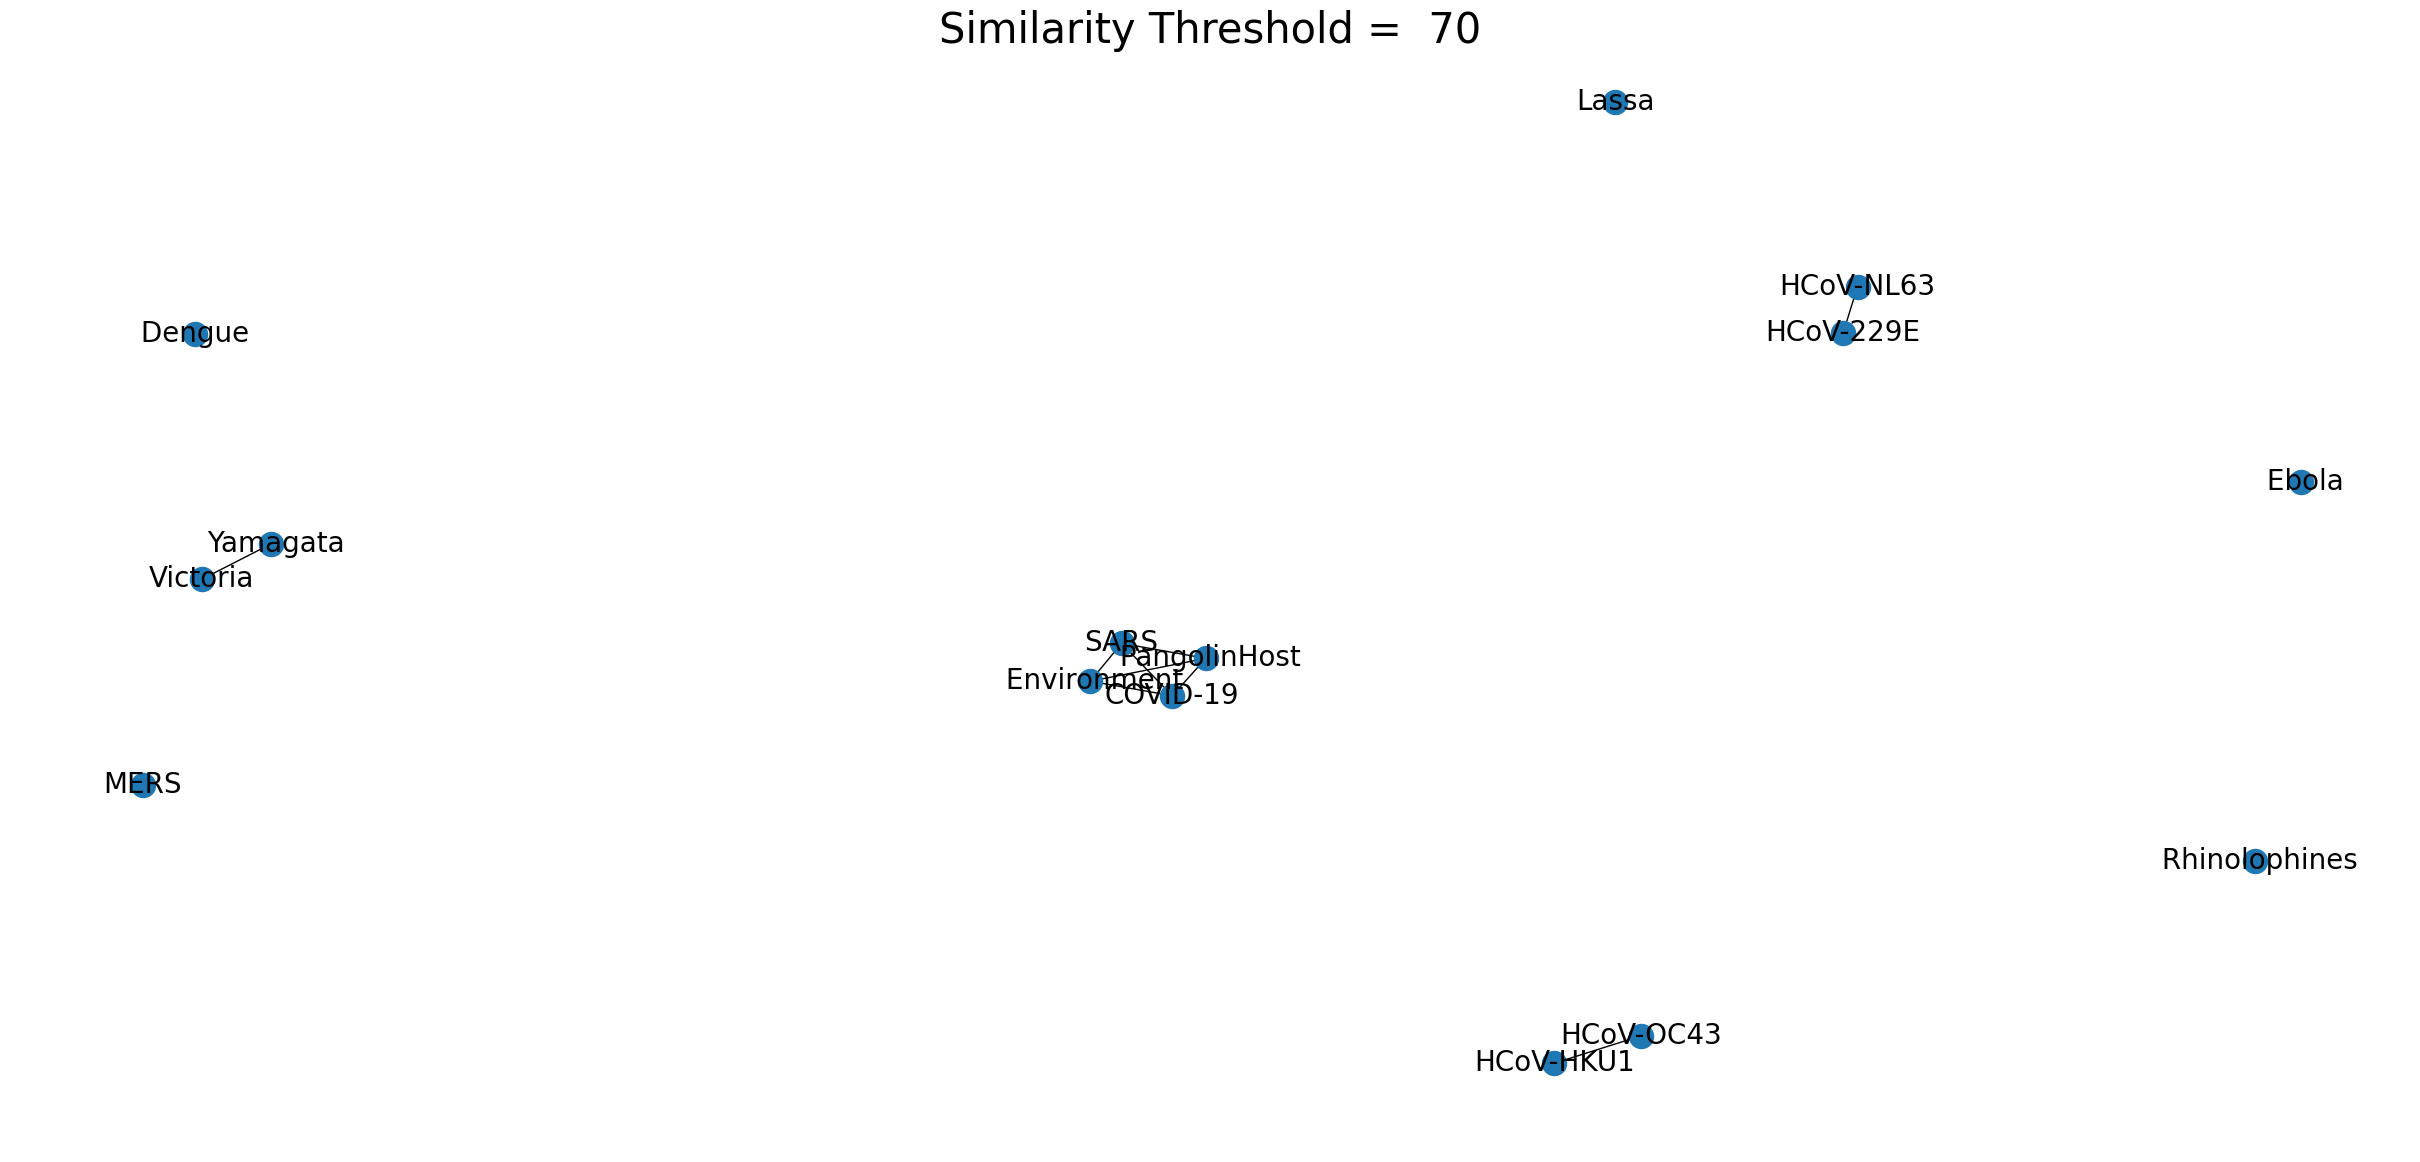

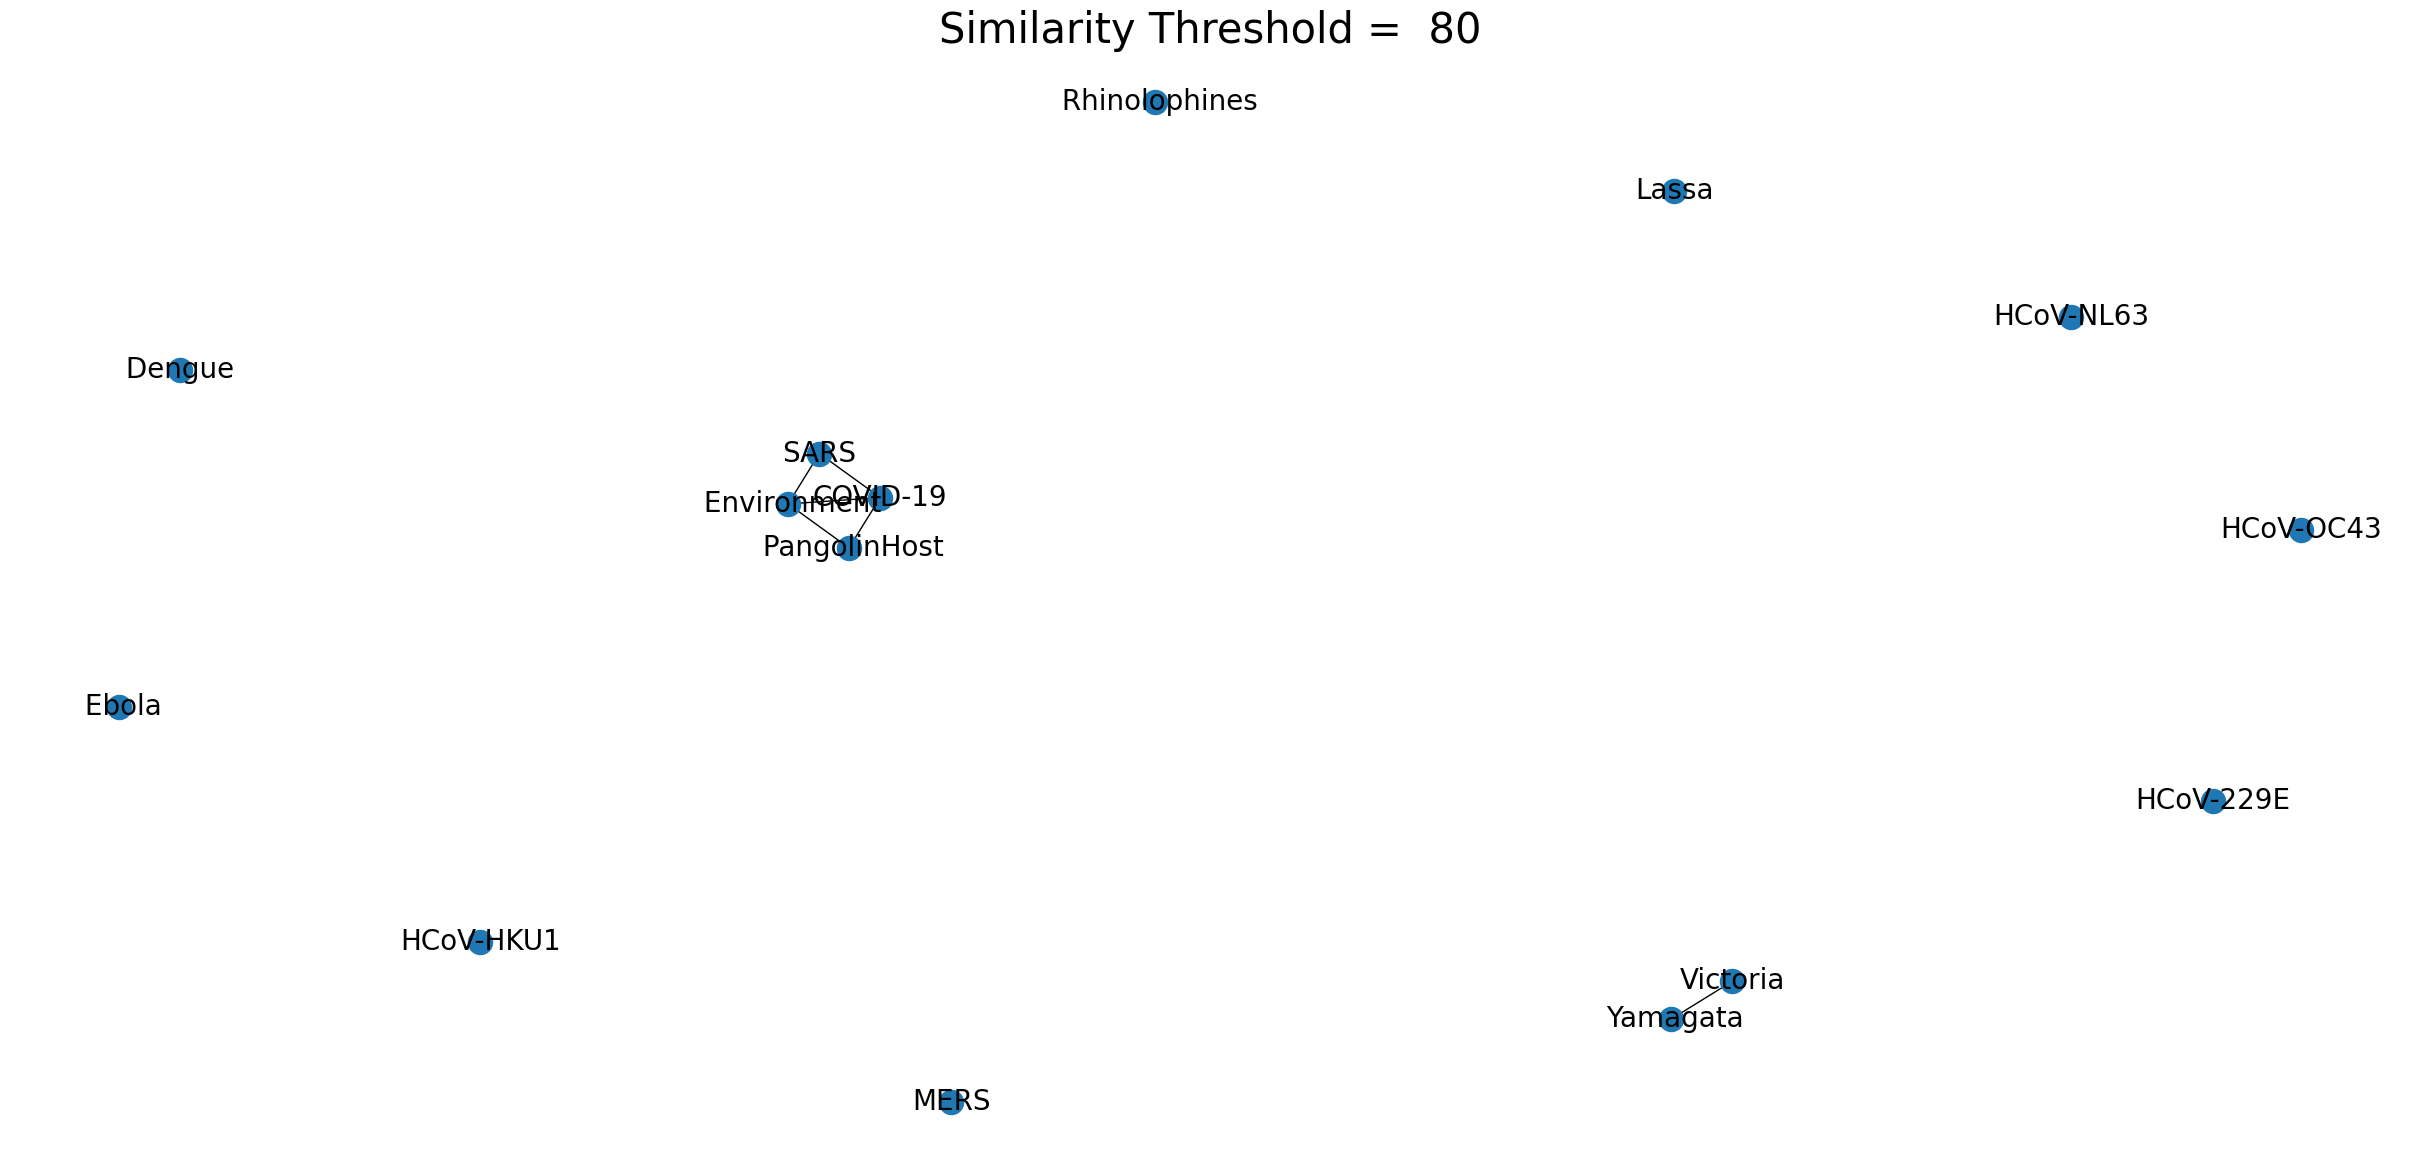

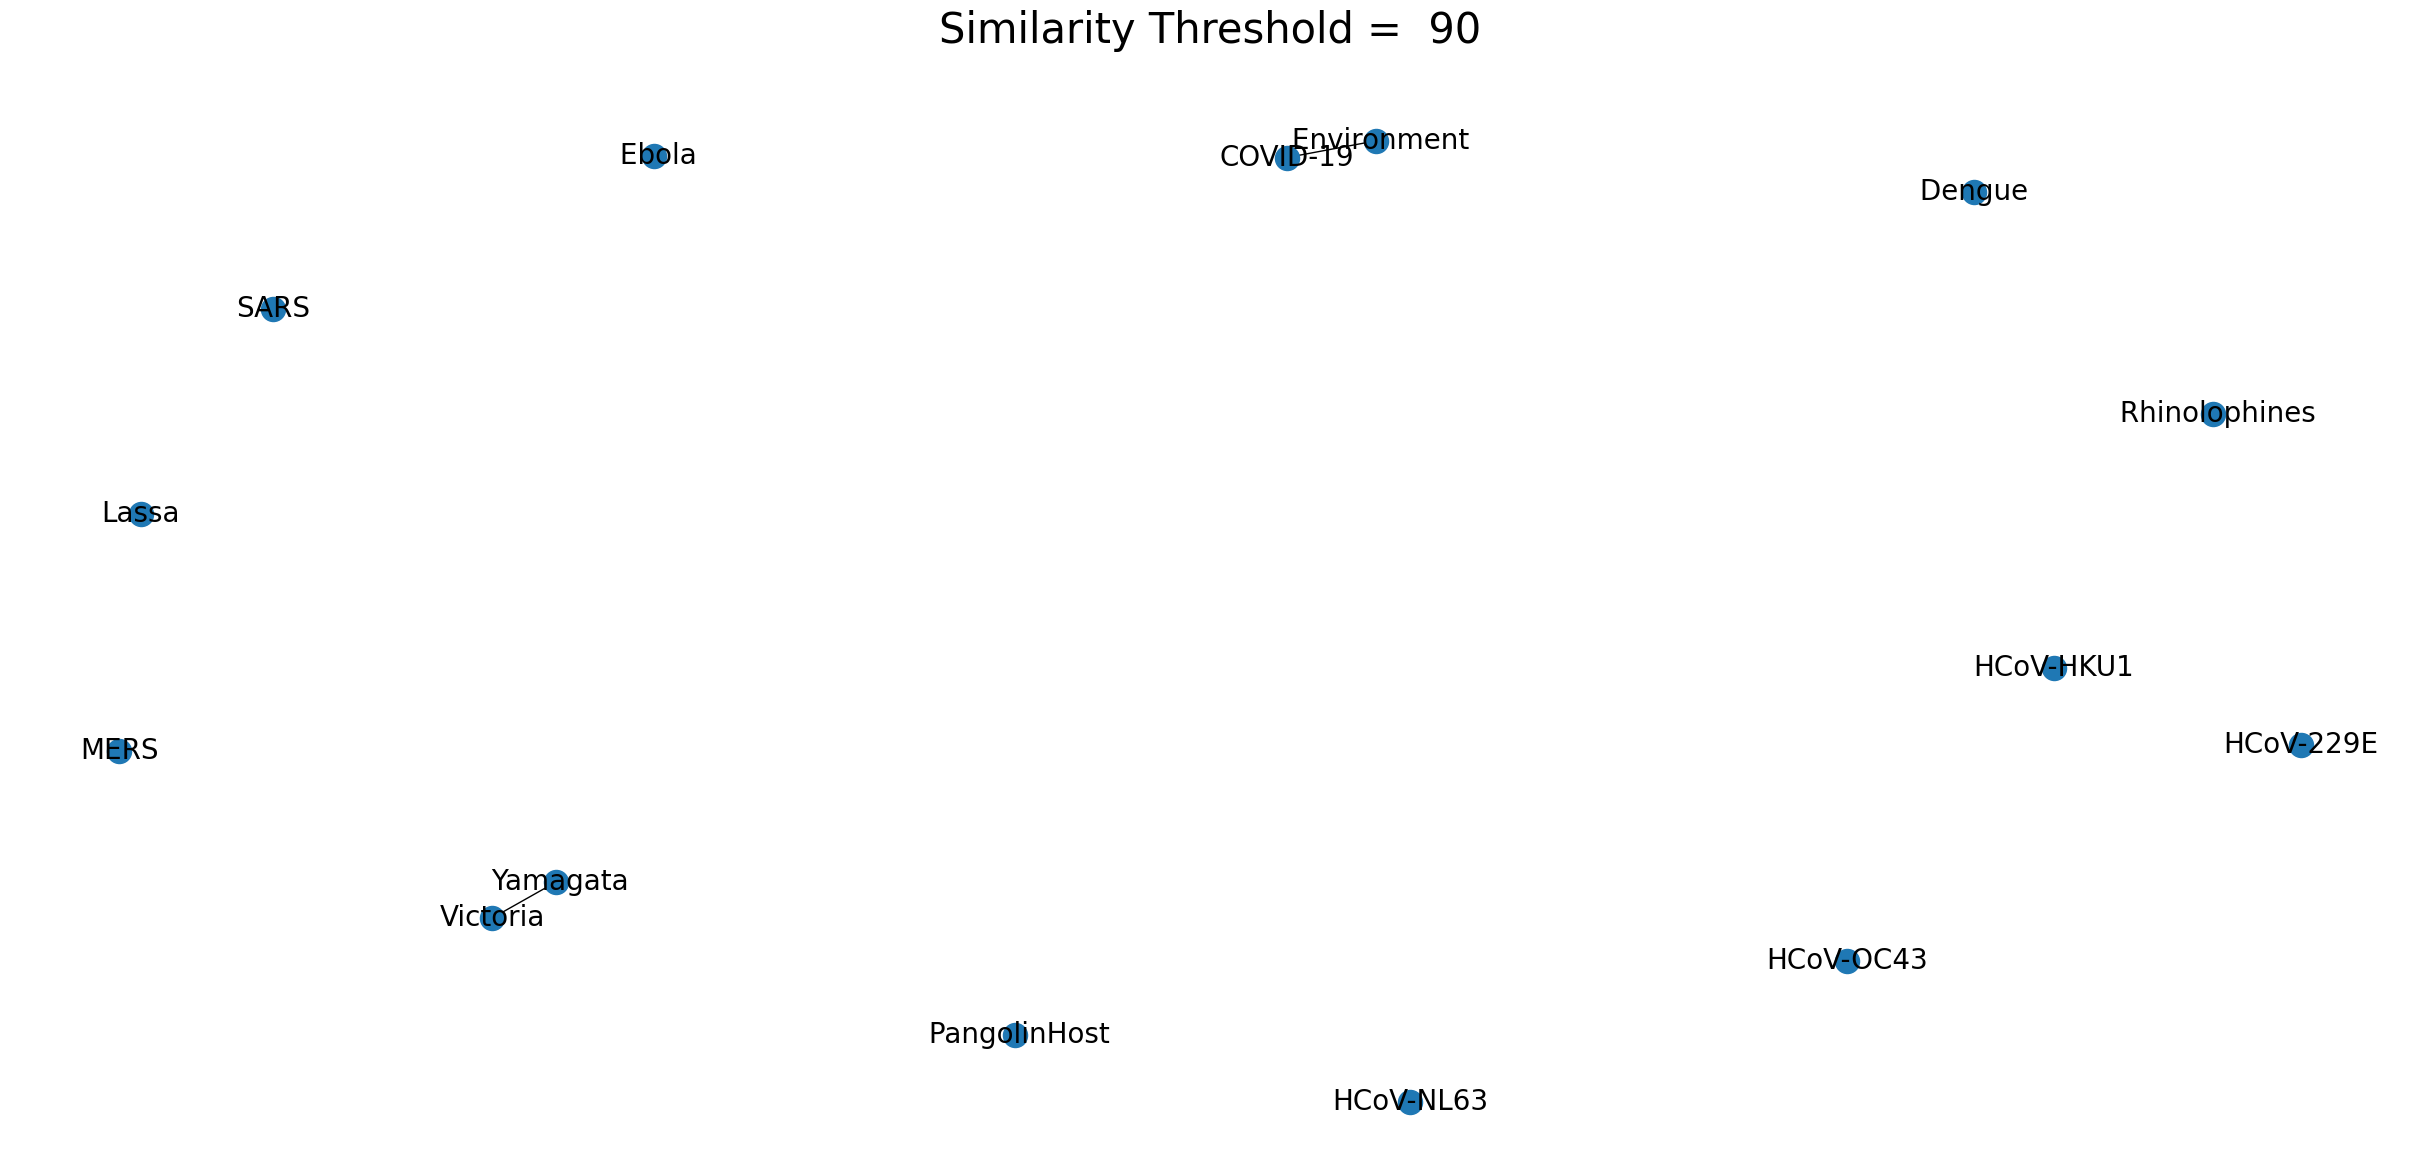

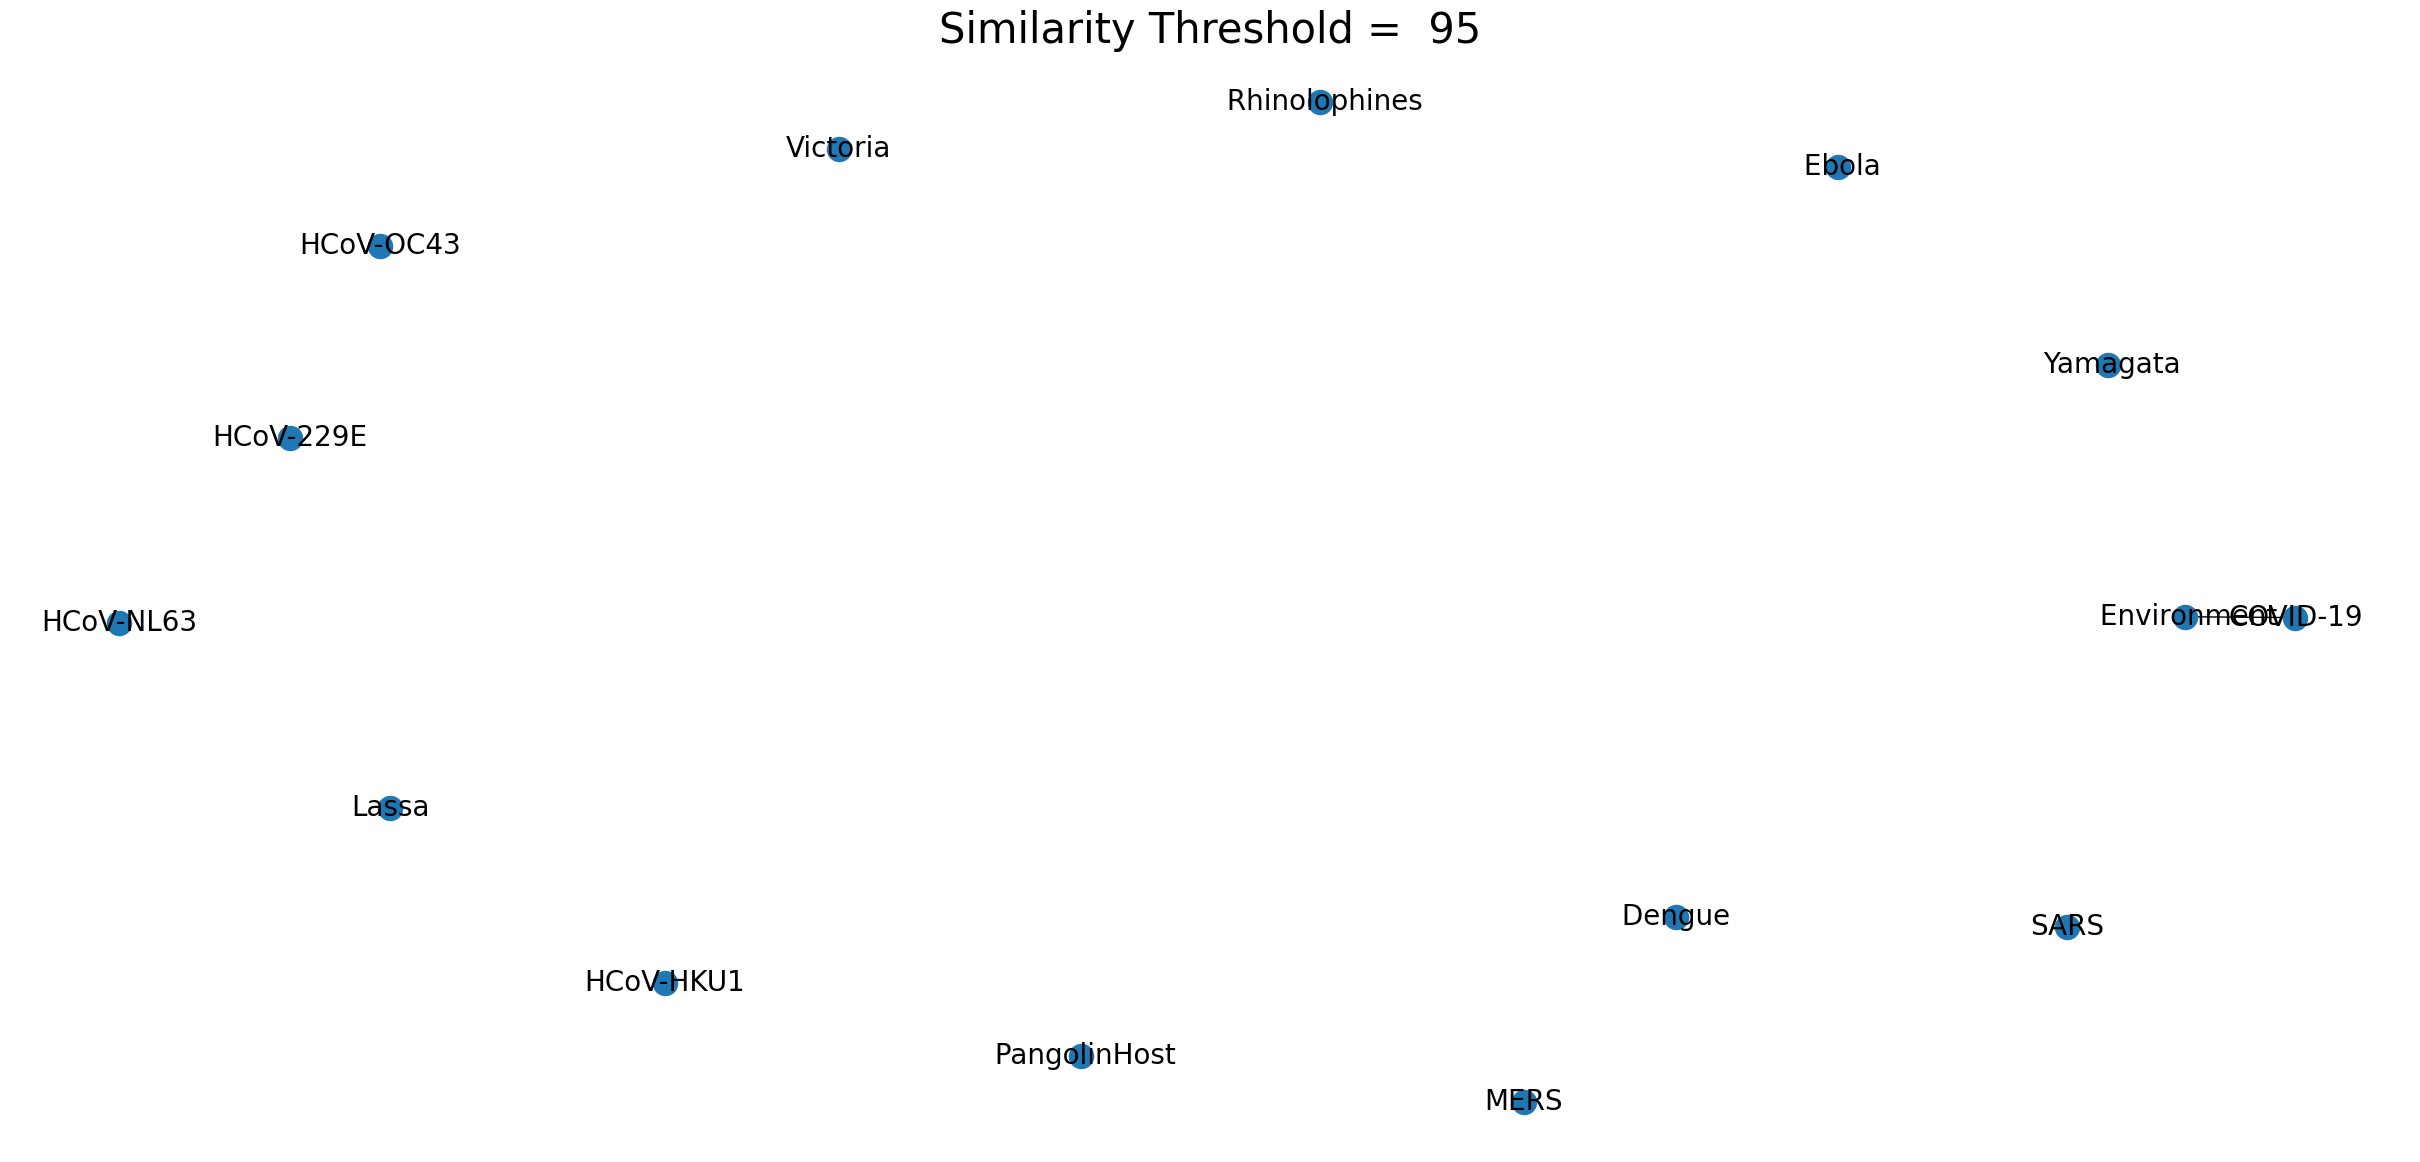

In [78]:
th=0
for G in Graphs:
    plt.figure(figsize=(24, 11))
    nx.draw(G, with_labels=True, labels=labelDict,font_color="black", font_size=20)
    plt.title(f'Similarity Threshold =  {threshold[th]}', fontsize=30)
    plt.show()
    th=th+1